<a href="https://colab.research.google.com/github/EmmarieR/CNM-DeepDive-Data-Science-Projects/blob/main/project1_ER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #1: Transaction Data Analysis Using Naive Bayes Classification

**Deep Dive Coding Part-Time**
___
Emmarie Ryan - March 7th, 2025

## Problem Definition


The task of this project is to predict the transactions of future customers based on previous customer data. This problem is a supervised learning problem because our goal is to classify future customers into a *buyer* and a *non-buyer* group, and the output/target variable is given in the Transaction Train data set. Naive Bayes will be used to model the transaction classification predictions.  
_______________

## Data Collection/Sources


### Data Overview ###

The Transaction Train data set is available online at [AWS S3](https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv)

This data set is an anonymized series of values associated with past complete and incomplete purchases. There are 50 'variables' associated with the output value, 'target.' There are 180,000 transaction entries in the data set, and takes 72.8 MB of memory.
___
Assumptions of the data set:
1. Target value of 1 indicates a completed purchase.
2. Target value of 0 indicates an incomplete purchase.
___


### Imports ###

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from IPython.display import Image

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


_______

### Load Data ###

Start by glancing over the data set and its elements in a Pandas data frame.

In [ ]:
trxn_base = pd.read_csv('https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv')
trxn_base.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
trxn_base.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


In [ ]:
trxn_base.transpose()

,0,1,2,3,4,5,6,7,8,9,...,179990,179991,179992,179993,179994,179995,179996,179997,179998,179999
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,179990,179991,179992,179993,179994,179995,179996,179997,179998,179999
ID_code,train_0,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,...,train_179990,train_179991,train_179992,train_179993,train_179994,train_179995,train_179996,train_179997,train_179998,train_179999
target,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
var_0,8.9255,11.5006,8.6093,11.0604,9.8369,11.4763,11.8091,13.558,16.1071,12.5088,...,10.0158,11.0303,10.3811,8.6353,15.7964,8.9112,8.2722,12.4902,8.4894,11.6252
var_1,-6.7863,-4.1473,-2.7457,-2.1518,-1.4834,-2.3182,-0.0832,-7.9881,2.4426,1.9743,...,-6.2072,-4.4768,-1.6522,-3.9536,-1.0888,-4.49,7.1923,-2.9379,0.7048,3.3959
var_2,11.9081,13.8588,12.0805,8.9522,12.8746,12.608,9.3494,13.8776,13.9307,8.896,...,12.5506,12.4445,10.5636,12.4717,17.2377,11.3795,16.73,6.5901,11.1518,11.5558
var_3,5.1187,5.6208,6.9427,5.8428,5.9405,4.5322,6.1961,5.689,4.4514,6.0637,...,5.8199,4.1073,5.7018,4.0501,4.1423,5.4164,4.9698,4.7242,4.637,4.2003
var_4,5.747,8.0851,5.9525,8.245,7.6784,5.979,7.9232,7.1971,9.0827,7.9682,...,9.1829,7.5998,9.8771,8.6818,7.7214,8.3309,5.4907,9.1423,8.1321,7.4666
var_5,14.0137,14.0239,14.1929,13.8463,13.8481,13.638,14.1629,14.2919,14.0654,13.9639,...,13.8532,13.812,14.193,14.2331,14.1565,14.1869,14.0238,13.9133,14.2921,13.7381
var_6,0.5745,8.4135,7.3124,11.9704,7.8895,1.2589,13.3058,10.9699,-3.0572,0.8071,...,-1.2734,3.6838,2.2785,13.1255,6.82,12.8219,11.9933,12.2314,6.9582,12.959


In [ ]:
trxn_base.shape

(180000, 53)

In [ ]:
# Sum of all the values in the target columns gives total number of completed purchases
completed_purchases = trxn_base['target'].sum()
print(completed_purchases)

# Percentage of ds entries that are completed purchases
(completed_purchases/len(trxn_base))*100

18040


10.022222222222222

The base data set has 53 columns consisting of:
- IDs
- target value
- variables (0-49)

The rows consist of individual complete purchase or incomplete purchase data. There are 180000 entries available, 18040 of which are complete purchases. Only about 10% of the entries in the data set are completed purchases.   

In [ ]:
trxn_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

So far, so good. Time to move onto cleaning the data.
____________

## Data Cleaning


### Check for Mis-entries ###

In [ ]:
trxn_cln = trxn_base.copy()

This is a very large data set, so it would be helpful to do a quick check for noticeable errors in data entry, like duplicated columns.

In [ ]:
trxn_cln.duplicated().sum()

0

We also want to check that all of the entries in the target column are valid: either 1 or 0.

In [ ]:
trxn_cln['target'].value_counts()

,count
target,
0,161960
1,18040


---------------

### Remove Redundant Columns ###

Looking through the five row snippets of the data frame with `.head()` and `.tail()` shows some redundancies with the given IDs for each transaction entry. We'll delete the `[Unnamed: 0]` and `[ID_code]` columns since Pandas will retain it's own number index of all the rows.

In [ ]:
trxn_cln = trxn_base.drop(columns=['Unnamed: 0', 'ID_code'])
trxn_cln.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


____________

### Check for Nulls ###

Looking through the `.info` output above, it doesn't look like there are any nulls in the data set. But, let's double check for any nulls.

In [ ]:
trxn_cln.isnull().sum().sum() # sums the values of all null counts in .isnull.sum() data series

0

No nulls to deal with today.
______

### Convert Floats to Integers ###

I see that all of the data types for the variable columns are `float64`. Floats may introduce some rounding errors later on in data analysis and require more processing power to work with, so we will convert all of our floats to integers.

In [ ]:
# for loop to multiply all the values in the variable columns by 10000, then convert all var columns to integers
for i in range(1,51):

  # multiplies variable columns x10,000. Replaces og columns with larger float values.
    trxn_cln.iloc[:,i] = trxn_cln.iloc[:,i]*10000

trxn_cln.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,89255.0,-67863.0,119081.0,51187.0,57470.0,140137.0,5745.0,42840.0,162191.0,...,54879.0,-47645.0,31531.0,185618.0,17202.0,258398.0,44354.0,39642.0,31364.0,127803.0
1,0,115006.0,-41473.0,138588.0,56208.0,80851.0,140239.0,84135.0,78000.0,27407.0,...,57999.0,55378.0,55134.0,302645.0,110752.0,225441.0,76421.0,77214.0,25837.0,183560.0
2,0,86093.0,-27457.0,120805.0,69427.0,59525.0,141929.0,73124.0,47011.0,181377.0,...,57690.0,-70927.0,-58234.0,256820.0,24013.0,230866.0,29057.0,97905.0,16704.0,147222.0
3,0,110604.0,-21518.0,89522.0,58428.0,82450.0,138463.0,119704.0,159426.0,125579.0,...,53430.0,-71541.0,117134.0,147483.0,56961.0,-4639.0,44666.0,47433.0,7178.0,179697.0
4,0,98369.0,-14834.0,128746.0,59405.0,76784.0,138481.0,78895.0,65263.0,189608.0,...,55518.0,14493.0,23705.0,184685.0,51743.0,118503.0,-14905.0,95214.0,-1508.0,179974.0


Check to make sure all of our float values are whole numbers

In [ ]:
# manually rounding the floats to elim float precision error
for i in range(1,51):
  trxn_cln.iloc[:, i] = trxn_cln.iloc[:, i].apply(np.floor)

trxn_cln.head(15)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,89255.0,-67863.0,119080.0,51186.0,57470.0,140137.0,5745.0,42840.0,162191.0,...,54879.0,-47645.0,31530.0,185618.0,17202.0,258398.0,44353.0,39642.0,31364.0,127803.0
1,0,115006.0,-41474.0,138588.0,56208.0,80851.0,140239.0,84135.0,78000.0,27407.0,...,57999.0,55378.0,55134.0,302645.0,110752.0,225441.0,76421.0,77214.0,25837.0,183560.0
2,0,86093.0,-27457.0,120805.0,69427.0,59525.0,141929.0,73124.0,47011.0,181377.0,...,57690.0,-70927.0,-58234.0,256820.0,24013.0,230866.0,29057.0,97905.0,16704.0,147222.0
3,0,110604.0,-21518.0,89522.0,58428.0,82449.0,138463.0,119704.0,159426.0,125579.0,...,53430.0,-71541.0,117134.0,147483.0,56961.0,-4639.0,44666.0,47432.0,7178.0,179697.0
4,0,98369.0,-14834.0,128745.0,59405.0,76784.0,138481.0,78895.0,65263.0,189608.0,...,55518.0,14493.0,23705.0,184685.0,51743.0,118503.0,-14905.0,95214.0,-1508.0,179974.0
5,0,114763.0,-23182.0,126080.0,45321.0,59790.0,136380.0,12588.0,67341.0,119882.0,...,59714.0,-61449.0,14457.0,218853.0,10208.0,210550.0,-63068.0,66025.0,52912.0,125809.0
6,0,118091.0,-832.0,93493.0,61961.0,79232.0,141629.0,133058.0,211976.0,242595.0,...,61887.0,2619.0,26965.0,170152.0,38973.0,119140.0,87830.0,64521.0,35325.0,108869.0
7,0,135580.0,-79881.0,138776.0,56890.0,71971.0,142919.0,109699.0,51548.0,144195.0,...,52272.0,89519.0,876.0,195642.0,592.0,240369.0,131700.0,65491.0,39906.0,86624.0
8,0,161071.0,24426.0,139307.0,44513.0,90827.0,140654.0,-30572.0,38349.0,63738.0,...,59018.0,31838.0,35803.0,329149.0,-21408.0,-17937.0,14298.0,147510.0,16395.0,195113.0
9,0,125088.0,19743.0,88960.0,60637.0,79682.0,139639.0,8071.0,54649.0,44221.0,...,58540.0,-30869.0,-45382.0,182209.0,23910.0,190645.0,5543.0,63160.0,10371.0,162375.0


In [ ]:
trxn_cln_whole = (trxn_cln % 1 == 0)
trxn_cln_whole.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
False in trxn_cln_whole.values

False

In [ ]:
# convert to integers
trxn_cln = trxn_cln.astype(int)
trxn_cln.head(15)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,89255,-67863,119080,51186,57470,140137,5745,42840,162191,...,54879,-47645,31530,185618,17202,258398,44353,39642,31364,127803
1,0,115006,-41474,138588,56208,80851,140239,84135,78000,27407,...,57999,55378,55134,302645,110752,225441,76421,77214,25837,183560
2,0,86093,-27457,120805,69427,59525,141929,73124,47011,181377,...,57690,-70927,-58234,256820,24013,230866,29057,97905,16704,147222
3,0,110604,-21518,89522,58428,82449,138463,119704,159426,125579,...,53430,-71541,117134,147483,56961,-4639,44666,47432,7178,179697
4,0,98369,-14834,128745,59405,76784,138481,78895,65263,189608,...,55518,14493,23705,184685,51743,118503,-14905,95214,-1508,179974
5,0,114763,-23182,126080,45321,59790,136380,12588,67341,119882,...,59714,-61449,14457,218853,10208,210550,-63068,66025,52912,125809
6,0,118091,-832,93493,61961,79232,141629,133058,211976,242595,...,61887,2619,26965,170152,38973,119140,87830,64521,35325,108869
7,0,135580,-79881,138776,56890,71971,142919,109699,51548,144195,...,52272,89519,876,195642,592,240369,131700,65491,39906,86624
8,0,161071,24426,139307,44513,90827,140654,-30572,38349,63738,...,59018,31838,35803,329149,-21408,-17937,14298,147510,16395,195113
9,0,125088,19743,88960,60637,79682,139639,8071,54649,44221,...,58540,-30869,-45382,182209,23910,190645,5543,63160,10371,162375


Let's check that the conversion worked.

In [ ]:
trxn_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   target  180000 non-null  int64
 1   var_0   180000 non-null  int64
 2   var_1   180000 non-null  int64
 3   var_2   180000 non-null  int64
 4   var_3   180000 non-null  int64
 5   var_4   180000 non-null  int64
 6   var_5   180000 non-null  int64
 7   var_6   180000 non-null  int64
 8   var_7   180000 non-null  int64
 9   var_8   180000 non-null  int64
 10  var_9   180000 non-null  int64
 11  var_10  180000 non-null  int64
 12  var_11  180000 non-null  int64
 13  var_12  180000 non-null  int64
 14  var_13  180000 non-null  int64
 15  var_14  180000 non-null  int64
 16  var_15  180000 non-null  int64
 17  var_16  180000 non-null  int64
 18  var_17  180000 non-null  int64
 19  var_18  180000 non-null  int64
 20  var_19  180000 non-null  int64
 21  var_20  180000 non-null  int64
 22  var_21  180000 non-n

Looks good. Shaved off about 800KBs of memory in the cleaning process.
_________




## Exploratory Data Analysis


### Distribution Visualization ###

The data type of the data set's target column is integer. Specifically, the target is categorical, binary nominal. In this case, our two classes of customers who will buy versus customers who won't buy are represented by the numbers 1 and 0 respectively. We checked the validity of the binary classification count by calling the `.value_counts()` method on the target column and verifying that there are only two unique options of values: 1 or 0. For our variable columns, we know that they are all numerical values because calling the `.info()` method on the original data set shows that those columns are `float64` data type.

In [ ]:
trxn_da = trxn_cln.copy()

In [ ]:
trxn_da.value_counts('target')

,count
target,
0,161960
1,18040


Let's visualize the distribution of all the fields in the data set. Since there is only one target and 50 variable types, this is not too costly nor too large to call simple histograms for all the fields.

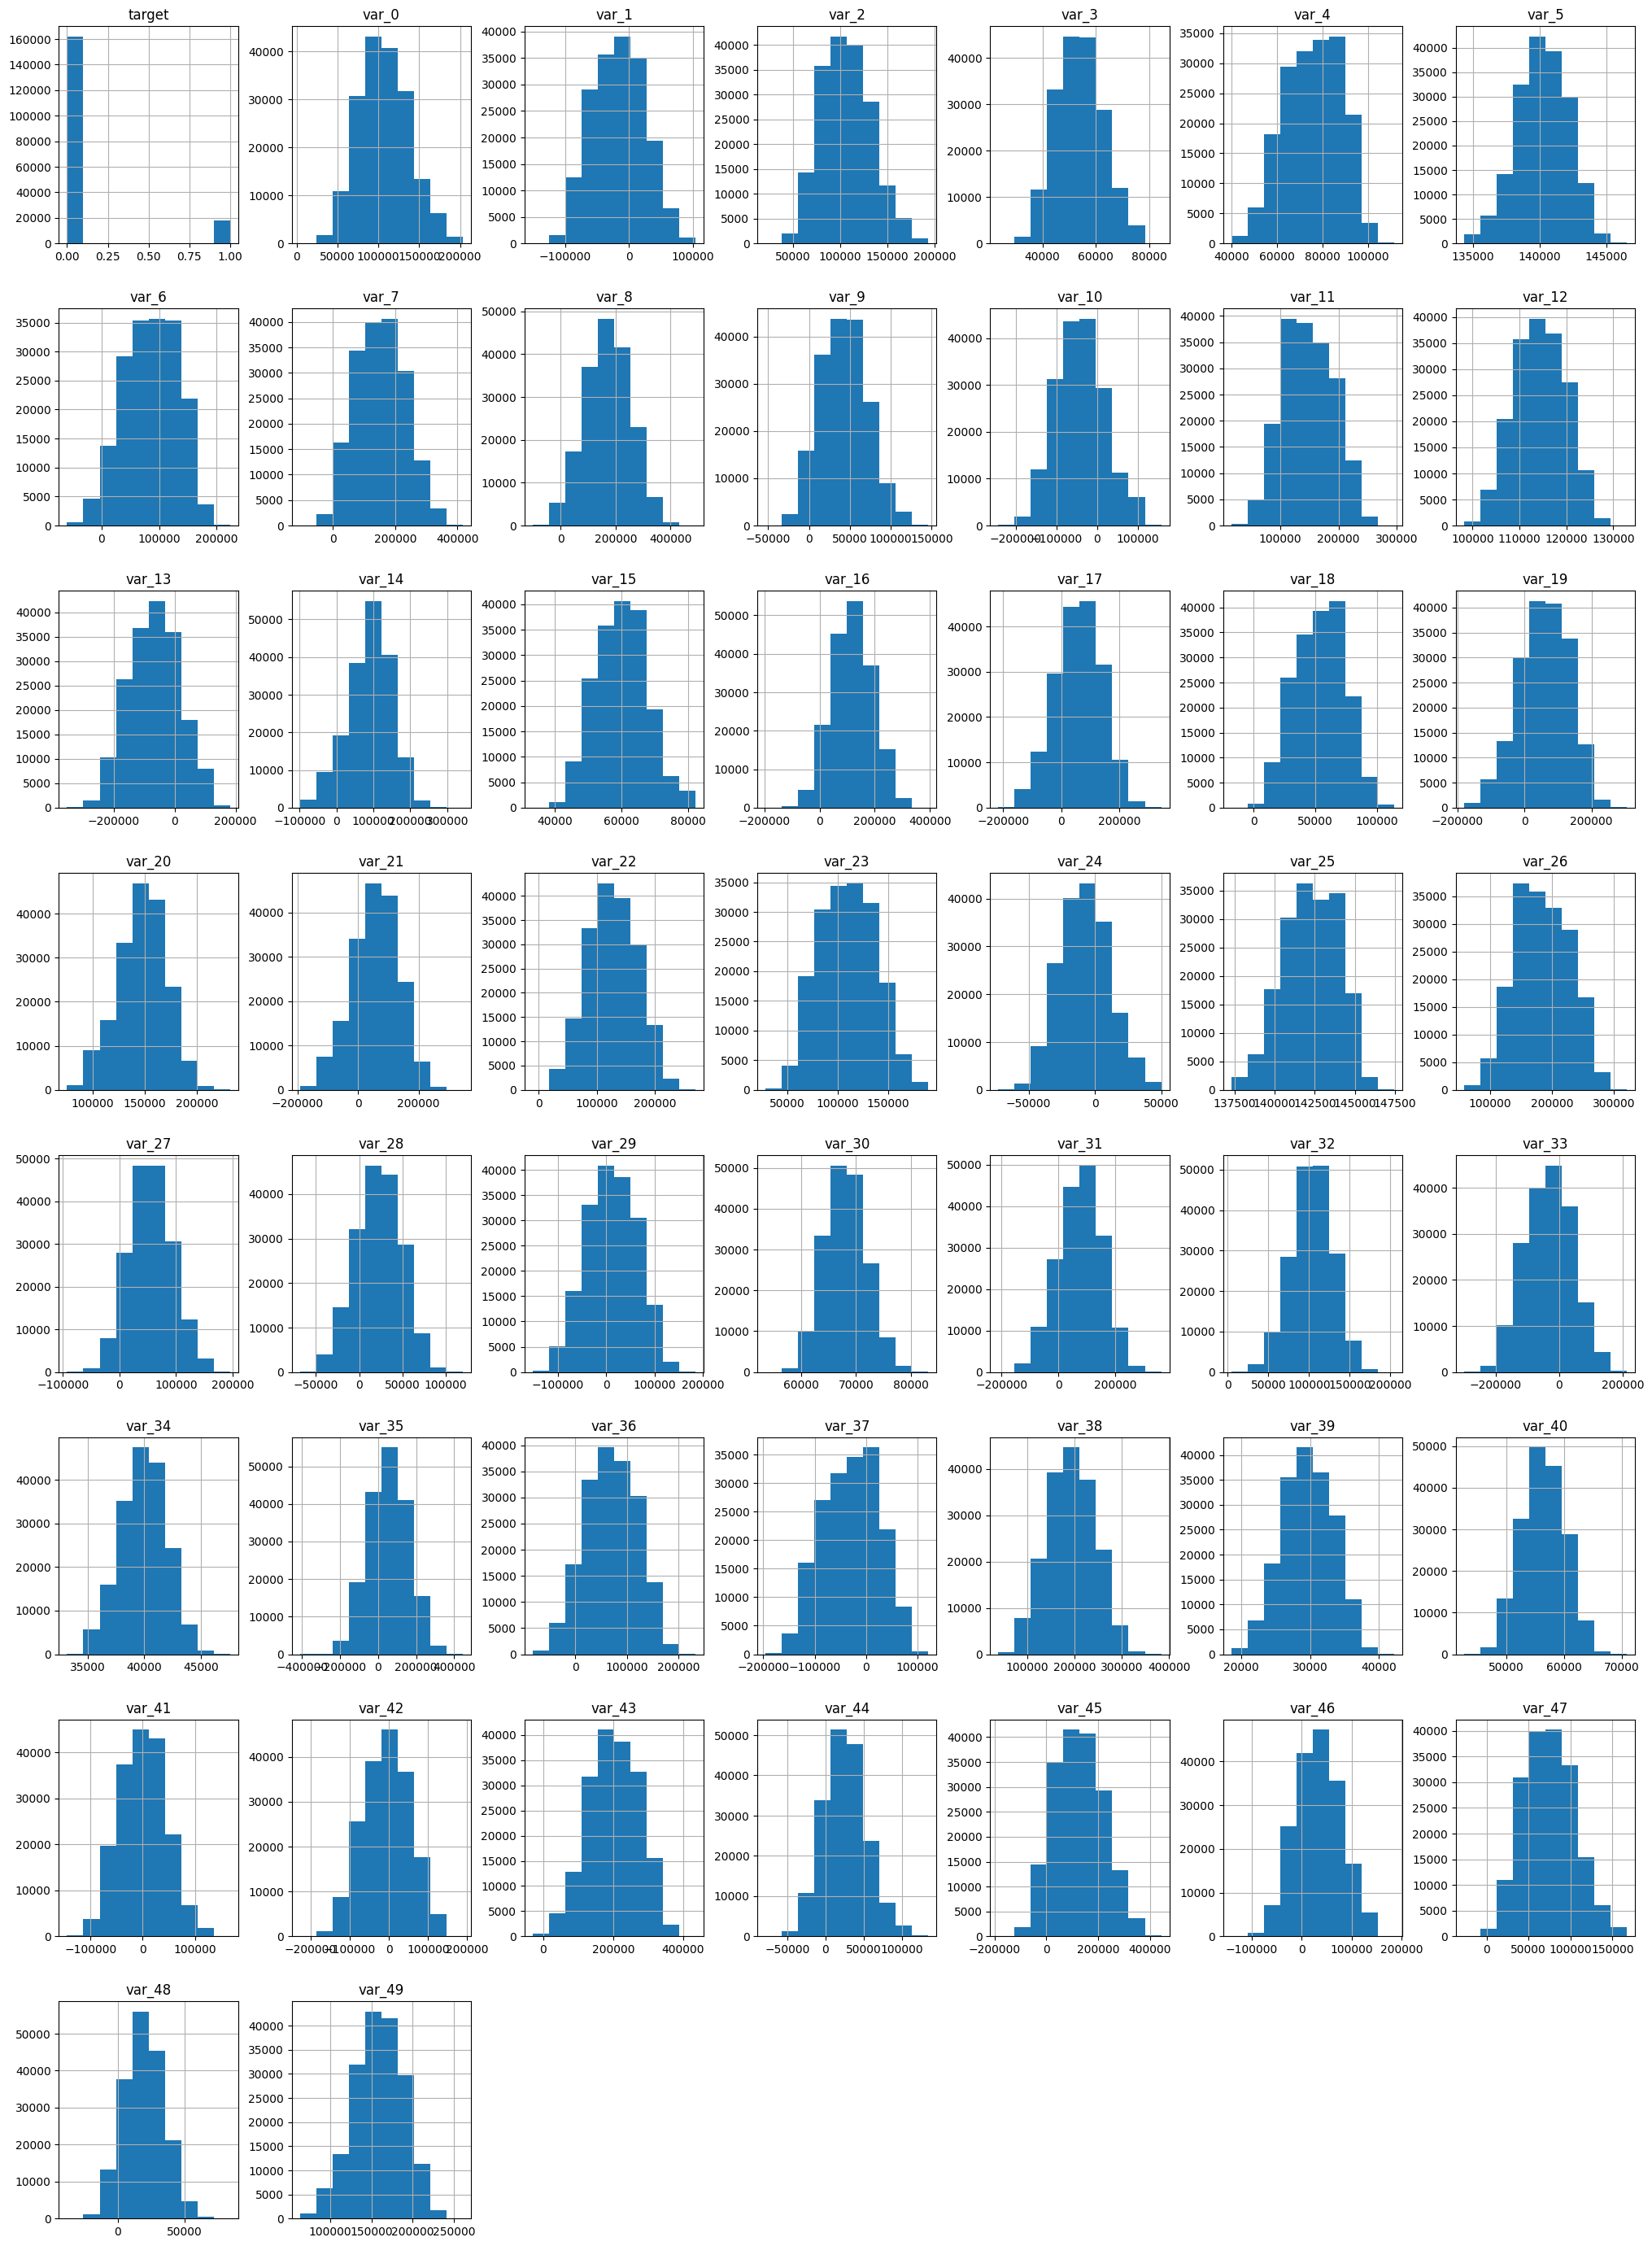

In [ ]:
plot = trxn_da.hist(figsize=(25,35))

Interesting to see that all of our variables follow rough normal distributions on their histograms. Variables 4, 18, and 37 seem to be worse for normal distribution, having more of a positive skew. Similar with variables 11 and 26, only those have a negative skew.

For the target histogram, we can see two distinct categories, confirming our assumptions about binary classification above.
_________________


### Variable Correlations ###

The two important assumptions of the Naive Bayes Theorem are that the predictors of the desired output are normally distributed, and that the predictors are independant of other predictors.

Here, we can make a correlation matrix to observe the relationships of all 50 variables to one another.

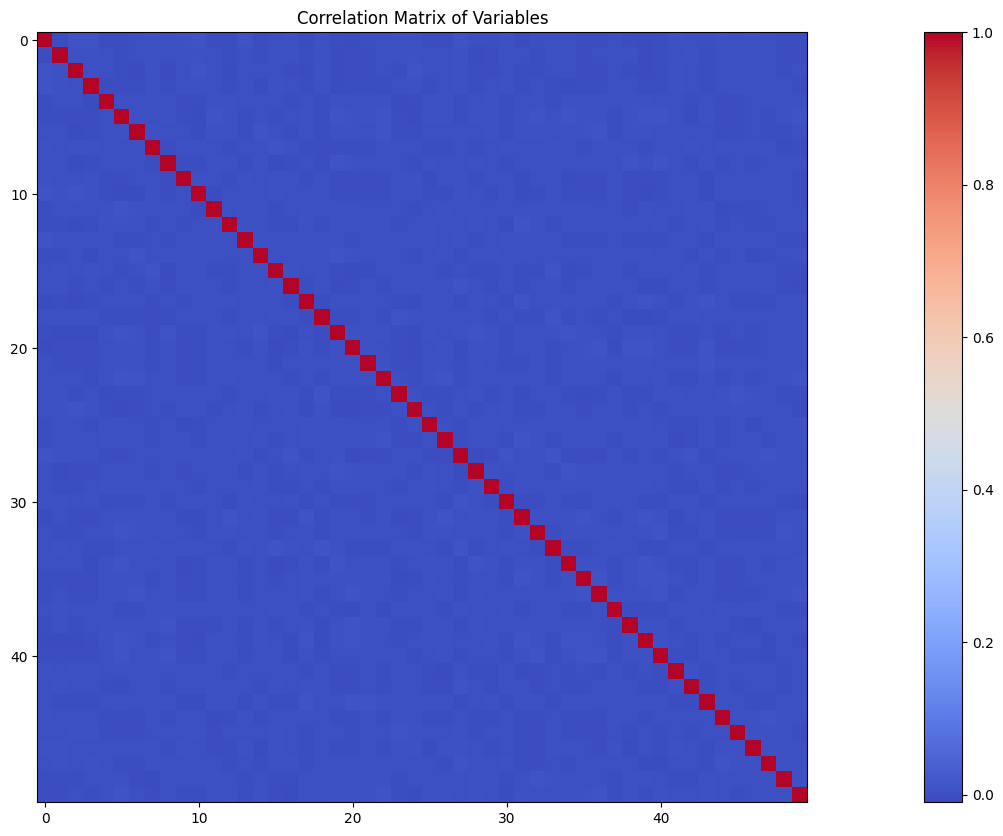

In [ ]:
# slicing only the variable columns:
trxn_var = trxn_da.iloc[:,1:]
var_corr = trxn_var.corr()

plt.figure(figsize=(30,10))
plt.title('Correlation Matrix of Variables')
plt.imshow(var_corr, cmap='coolwarm')
plt.colorbar()
plt.show()

This correlation matrix looks great for Naive Bayes. All of the correlations show as deep blue, or nearing 0. The closer the correlation coefficient of two variables is to 0, the higher the level of independance of the variables between one another. We can double check the message of this correlation matrix by making a data series of all our correlation coefficients and ordering them from largest to smallest absolute values.

In [ ]:
var_corr_series = var_corr.unstack().sort_values(ascending=False)

# remove all instances of self-correlations and turn all remaining correlations into absolute values.
var_corr_series = abs(var_corr_series[var_corr_series != 1])
var_corr_series

,,0
var_38,var_20,0.009728
var_20,var_38,0.009728
var_32,var_40,0.009601
var_40,var_32,0.009601
var_28,var_34,0.009238
...,...,...
var_1,var_19,0.009469
var_15,var_34,0.009786
var_34,var_15,0.009786
var_31,var_10,0.009935


All of these correlation coefficients are small fractions close to zero, indicating high linear independence between all of the variables.
________________________________________________________

### Data Classification Preparation ###

Let's take some time to split the data frame into the two target classification groups: 0, non-buyers; 1, buyers.

In [ ]:
# Making two copies of the data frame, one with target 0, the other target 1.
trxn_da_0 = trxn_da[trxn_da['target'] == 0].copy()
trxn_da_1 = trxn_da[trxn_da['target'] == 1].copy()

In [ ]:
trxn_da_0.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,161960.0,161960.000000,161960.000000,161960.000000,161960.000000,161960.000000,161960.000000,161960.000000,161960.000000,161960.000000,...,161960.000000,161960.000000,161960.000000,161960.000000,161960.000000,161960.000000,161960.000000,161960.000000,161960.000000,161960.000000
mean,0.0,106249.503643,-16975.309120,106640.746678,53893.312806,75842.886558,140284.574518,86123.072308,151261.123240,174219.585997,...,56420.610984,-712.012114,-7511.900852,203547.361157,25472.925377,126086.689374,31495.713892,73948.178847,19481.493770,159221.217578
std,0.0,30098.893343,40256.682872,26119.934602,8574.786630,12290.807785,1873.977790,46047.177885,78059.697968,81426.837305,...,3677.640839,43851.738948,59453.023526,70621.759394,27689.240694,92633.454313,45232.523458,29971.599951,14748.447346,29773.600894
min,0.0,4084.000000,-150434.000000,21171.000000,23473.000000,39705.000000,134346.000000,-60111.000000,-106642.000000,-100890.000000,...,42588.000000,-145060.000000,-227487.000000,-29953.000000,-78561.000000,-184897.000000,-140933.000000,-26917.000000,-38145.000000,62993.000000
25%,0.0,84265.000000,-47960.000000,86954.000000,47573.000000,66367.000000,138996.000000,51603.000000,90795.000000,117449.000000,...,53818.000000,-32991.250000,-50715.250000,152262.750000,6064.000000,55438.500000,-1144.000000,51339.000000,9155.750000,138958.000000
50%,0.0,104790.000000,-16832.000000,105283.500000,53645.000000,76445.000000,140297.000000,86829.000000,150824.000000,174142.500000,...,56413.000000,-551.000000,-6338.000000,203431.000000,24753.000000,123524.000000,31159.500000,73017.000000,19266.500000,159863.000000
75%,0.0,126912.000000,12904.000000,124626.000000,59819.000000,85975.000000,141668.000000,123310.000000,208834.250000,232003.000000,...,59102.000000,30217.000000,35352.500000,257352.250000,43384.000000,193014.500000,62955.250000,94624.000000,29678.000000,180888.000000
max,0.0,203150.000000,103768.000000,193530.000000,84477.000000,111506.000000,146545.000000,223314.000000,417480.000000,490443.000000,...,70890.000000,167319.000000,188554.000000,435468.000000,134487.000000,443634.000000,184409.000000,167165.000000,84024.000000,260791.000000


In [ ]:
trxn_da_1.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,18040.0,18040.000000,18040.000000,18040.000000,18040.000000,18040.000000,18040.000000,18040.000000,18040.000000,18040.000000,...,18040.000000,18040.000000,18040.000000,18040.000000,18040.000000,18040.000000,18040.000000,18040.000000,18040.000000,18040.000000
mean,1.0,111606.919734,-10242.404213,111513.914856,55823.880820,74112.534424,139841.496951,77718.364967,162965.622838,158545.545565,...,55804.566408,6349.948891,754.632650,188989.955100,30241.356818,140843.732871,40138.831929,78527.056264,17378.406874,154036.503437
std,0.0,32683.765105,42192.011837,28340.749582,9235.331226,12768.587335,2080.796435,48970.548283,81698.716030,86004.413069,...,3815.255150,47009.749595,61210.753792,76107.339256,30469.969790,97229.047034,48207.158547,32038.663916,14806.815825,32561.968639
min,1.0,4528.000000,-140370.000000,33435.000000,24960.000000,41861.000000,134994.000000,-44264.000000,-65871.000000,-80054.000000,...,46076.000000,-137249.000000,-213973.000000,-20371.000000,-71376.000000,-151392.000000,-119069.000000,-23430.000000,-33177.000000,65587.000000
25%,1.0,87011.000000,-42143.250000,89525.000000,48832.750000,64598.250000,138420.000000,42236.000000,100710.000000,97748.250000,...,53063.000000,-28354.250000,-42694.000000,136411.250000,8295.250000,67148.750000,4718.500000,54184.000000,6724.750000,132461.500000
50%,1.0,110103.500000,-9984.500000,110938.500000,56038.500000,74880.500000,139829.000000,79460.500000,162217.000000,155920.500000,...,55767.000000,6115.500000,1517.000000,189458.000000,28657.000000,139394.000000,40403.500000,78365.000000,16680.000000,154427.500000
75%,1.0,133442.750000,19964.250000,130409.500000,62209.500000,84355.000000,141419.000000,116778.500000,221961.750000,220796.500000,...,58587.000000,38360.500000,44968.250000,245957.500000,49968.500000,208821.250000,74329.500000,100059.250000,27498.750000,177945.500000
max,1.0,194583.000000,88029.000000,182941.000000,82852.000000,105881.000000,145883.000000,207459.000000,417480.000000,439521.000000,...,68516.000000,155989.000000,175920.000000,399790.000000,127902.000000,416504.000000,162116.000000,165204.000000,76476.000000,248950.000000


Looks good. Using the `.describe()` method is an easy way to return the standard deviation of the target columns. If the standard deviation is 0, then there is no variance in the column, indicating that we have a successful splitting of the data frames by target value.
___________

## Processing


### Data Prep ###

Now it it time to jump into training a machine learning model for predicting our target values. For this project, we have decided to employ Gaussian Naïve Bayes. Bayes is a viable choice for a machine learning model when the predictor value(s) are normally distributed and when the predictor values have no to low linear correlation to each other. However, we have seen that Gaussian Naïve Bayes can be forgiving in predictions when the above criteria are not fully met.   

To get started, we will make another set of data frame copies, one with just the target column, and the other with just the variable columns.

In [ ]:
trxn_da_target = trxn_da['target'].copy()


trxn_da_var = trxn_da.drop(columns=['target']).copy()

In [ ]:
trxn_da_target.info

<bound method Series.info of 0         0
1         0
2         0
3         0
4         0
         ..
179995    0
179996    0
179997    0
179998    0
179999    0
Name: target, Length: 180000, dtype: int64>

In [ ]:
trxn_da_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
179995,0
179996,0
179997,0
179998,0


In [ ]:
trxn_da_var

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,89255,-67863,119080,51186,57470,140137,5745,42840,162191,25791,...,54879,-47645,31530,185618,17202,258398,44353,39642,31364,127803
1,115006,-41474,138588,56208,80851,140239,84135,78000,27407,85524,...,57999,55378,55134,302645,110752,225441,76421,77214,25837,183560
2,86093,-27457,120805,69427,59525,141929,73124,47011,181377,12145,...,57690,-70927,-58234,256820,24013,230866,29057,97905,16704,147222
3,110604,-21518,89522,58428,82449,138463,119704,159426,125579,68202,...,53430,-71541,117134,147483,56961,-4639,44666,47432,7178,179697
4,98369,-14834,128745,59405,76784,138481,78895,65263,189608,101102,...,55518,14493,23705,184685,51743,118503,-14905,95214,-1508,179974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,89111,-44900,113795,54164,83309,141869,128219,223368,114176,36973,...,59355,51764,-54817,207390,-8043,313663,87194,47839,9673,149529
179996,82722,71923,167300,49698,54907,140238,119933,160279,157685,32069,...,53550,-15557,73839,99193,50860,280185,74145,42814,25575,153969
179997,124902,-29379,65901,47242,91423,139133,122314,152717,77995,33400,...,60708,-3463,-50098,204807,59814,202668,31006,37701,1298,161256
179998,84894,7048,111518,46369,81321,142921,69582,204503,299869,37526,...,55161,31774,-49374,236365,10431,299365,96381,69649,25546,156759


______

### Gaussian Naive Bayes Model Training  ###

For our model training, we will use sklearn packages for Gaussian Naive Bayes modeling

In [ ]:
model = GaussianNB()

In [ ]:
# 25% data set called for training set
var_train, var_test, tar_train, tar_test = train_test_split(trxn_da_var, trxn_da_target, test_size=0.25, random_state=0)

model.fit(var_train, tar_train)
tar_pred = model.predict(var_test)

In [ ]:
pred_results = tar_test == tar_pred
pred_results.value_counts()

,count
target,
True,40914
False,4086


In [ ]:
tar_tr = pred_results[pred_results == True].count()
tar_fl = pred_results[pred_results == False].count()

calc_acc = tar_tr / (tar_tr + tar_fl)
f"Accuracy of the model: {calc_acc * 100}%"

'Accuracy of the model: 90.92%'

In [ ]:
# quicker with sklearn
f"Accuracy of the model: {accuracy_score(tar_test, tar_pred)*100}%"

'Accuracy of the model: 90.92%'

______

### Cross-Validation Loop ###

Double check our reported accuracy with cross-validation accuracy.

In [ ]:
results = cross_val_score(model, trxn_da_var, trxn_da_target, cv=20)

f"Cross-validation accuracy: {results.mean()*100}%"

'Cross-validation accuracy: 91.11555555555556%'

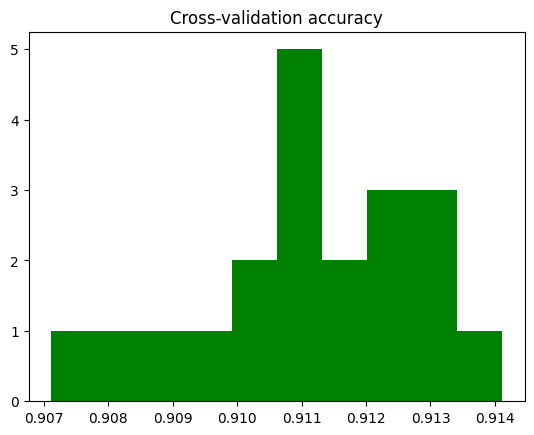

In [ ]:
# histogram ov cv scores
plt.hist(results, color = 'green')
plt.title('Cross-validation accuracy')

#save image
plt.savefig('Cross-validation.png')

The cross-validation scores all lie between 0.90 and 0.92, with the mode being ~0.911. This series of accuracy values lines up with the single accuracy calculated above.
____

### Confusion Matrix ###

To visualize where the model may be struggling to predict the target, we can make a confusion matrix.

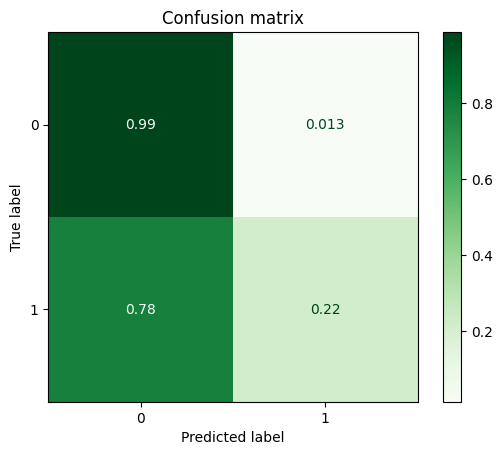

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    model,
    var_test,
    tar_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'Greens',
    )
plt.grid(False)
plt.title('Confusion matrix')

plt.savefig('Confusion_matrix.png')

It looks like our model does great when predicting when a target is 0, but struggles to predict accurately when the target is 1. This could be because our data set is skewed towards the target being 0, and we have not accounted for that yet in our test groupings.
_________

### Balance Training Groups ###

To address the skew in the data set, we will adjust the population of the training sets for our Gaussian Naive Bayes model. We will aim for the training sets to have equal proportions of target 0 and target 1 data points.

In [ ]:
# Recall data frames from data classification preparation

print(f"Target 0 rows: {len(trxn_da_0)}")
print(f"Target 1 rows: {len(trxn_da_1)}")

# Randomly sample rows from the target 0 data frame into a copy so that both data frames have the same number of rows
np.random.seed(0)
trxn_da_0_cut = trxn_da_0.sample(len(trxn_da_1)).copy()

print(f"Target 0 rows: {len(trxn_da_0_cut)}")

# Concatinate the two data frames
trxn_da_bal = pd.concat([trxn_da_0_cut, trxn_da_1])
trxn_da_bal

Target 0 rows: 161960
Target 1 rows: 18040
Target 0 rows: 18040


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
25132,0,69168,29403,74971,61616,85164,142442,63869,149908,83779,...,64426,28194,-113778,177581,25348,235966,59500,114220,16713,152545
86955,0,84995,15150,135783,51395,62958,141433,60757,180811,66294,...,59029,34167,37005,258362,-16705,45425,94687,96979,13116,165152
15693,0,86210,23758,91416,46087,83915,141438,59814,125848,133377,...,51613,-63802,27496,234259,16170,61497,-57169,94703,6972,194881
48276,0,107510,39906,115489,67163,94172,138547,114376,101400,220857,...,54894,55037,95457,182647,32709,203943,95746,68493,27157,174045
14654,0,84603,7850,133231,43762,54121,139563,122289,84807,202414,...,48874,-616,23708,202967,19769,161354,12624,109627,42497,183768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179949,1,80020,-6347,104115,66628,74319,141266,32978,234884,189512,...,50568,14224,-61051,324652,60889,163209,79024,102830,23823,137123
179956,1,128143,17022,125143,51252,59459,140384,19840,166534,214191,...,55592,66583,-33179,183914,54363,129044,13307,91192,8223,168015
179964,1,107885,-27318,99486,54814,58853,136646,6277,123875,-1087,...,50744,9305,42118,103895,65844,339682,9674,82838,14019,151976
179968,1,71795,-18935,136706,45245,52765,139576,84353,260088,254347,...,49769,-64637,12472,273877,27317,-74564,25978,99902,9539,171436


In [ ]:
trxn_da_bal['target'].value_counts()

,count
target,
0,18040
1,18040


_____

### Re-Train Gaussian Naive Bayes Model ###

In [ ]:
# Split the data frame into targets and variables
trxn_da_target_b = trxn_da_bal['target'].copy()
trxn_da_var_b = trxn_da_bal.drop(columns=['target']).copy()

In [ ]:
model_b = GaussianNB()

In [ ]:
# Retrain the model with the balanced training sets.
var_train_b, var_test_b, tar_train_b, tar_test_b = train_test_split(trxn_da_var_b, trxn_da_target_b, test_size=0.25, random_state=0)


model_b.fit(var_train_b, tar_train_b)
tar_pred_b = model_b.predict(var_test_b)

In [ ]:
pred_results_b = tar_test_b == tar_pred_b
pred_results_b.value_counts()

,count
target,
True,6838
False,2182


In [ ]:
# check accuracy
f"Accuracy of the model: {accuracy_score(tar_test_b, tar_pred_b)*100}%"

'Accuracy of the model: 75.80931263858093%'

At first glance, it appears that our accuracy has dropped to ~76%

______

### Cross-Validation Loop ###

In [ ]:
results_b = cross_val_score(model_b, trxn_da_var_b, trxn_da_target_b, cv=20)

f"Cross-validation accuracy: {results_b.mean()*100}%"

'Cross-validation accuracy: 75.7150776053215%'

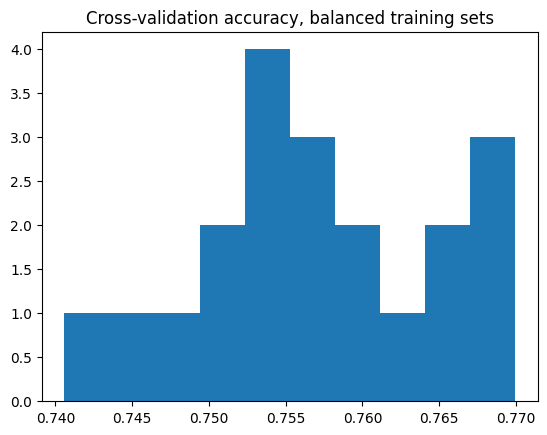

In [ ]:
# histogram of cv values
plt.hist(results_b)
plt.title('Cross-validation accuracy, balanced training sets')

plt.savefig('Cross-validation_balanced.png')

We are consistently seeing the accuracy range from 0.74 to 0.77.

______

### Confusion Matrix ###

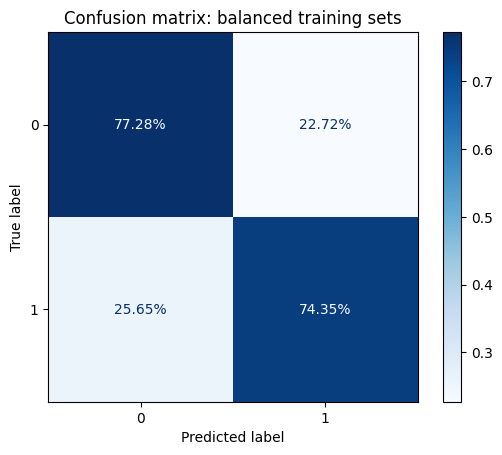

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    model_b,
    var_test_b,
    tar_test_b,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'Blues',
    )
plt.grid(False)
plt.title('Confusion matrix: balanced training sets')

plt.savefig('Confusion_matrix_balanced.png')

Now we are seeing ~75% accuracy in the model being correct in it's prediction, regardless of the target value.
______

## Data Visualization


### Cross-Validation Comparison###

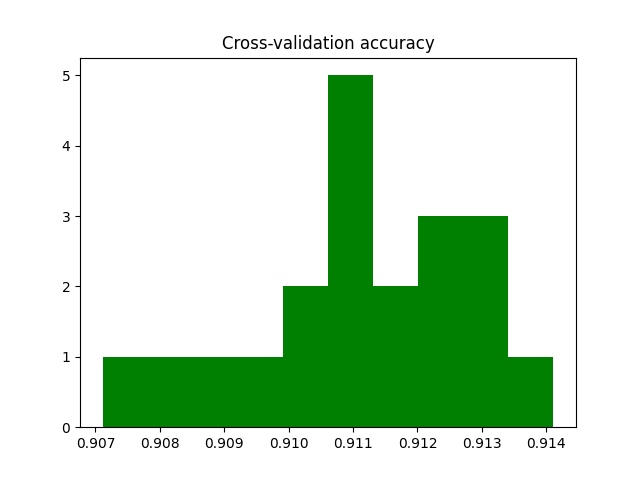

In [ ]:
Image('Cross-validation.png')

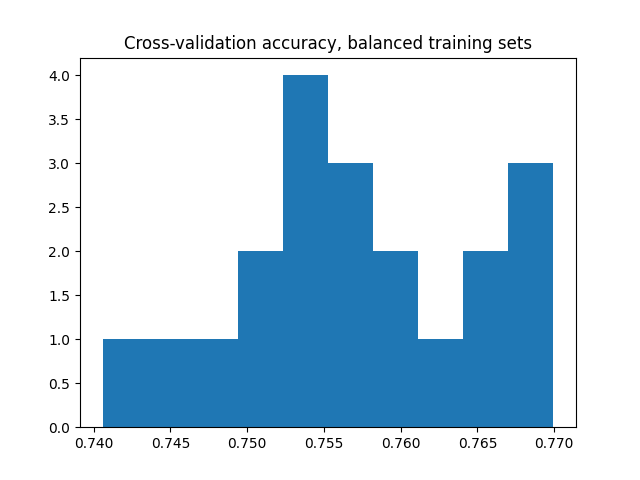

In [ ]:
Image('Cross-validation_balanced.png')

The first figure is a histogram of 20 replicates of accuracy cross-validation for the first iteration of the model. The second figure is a histogram of 20 replicates of accuracy cross-validation for the second, balanced training set, iteration of the model.

According to our cross-validation calculations, our first model seems much more accurate. The range of accuracy is from 0.907 to 0.914, so the true accuracy would be close to 90%-91%.

The second set was trained with a data frame containing an even 50/50 split of target values 0 and 1. Running the cross-validation for this balanced model shows a significant drop in accuracy. Here, we have the range in accuracy being 0.740 to 0.77, so the true accuracy may be 75%-76%
____

### Confusion Matrix Comparison###

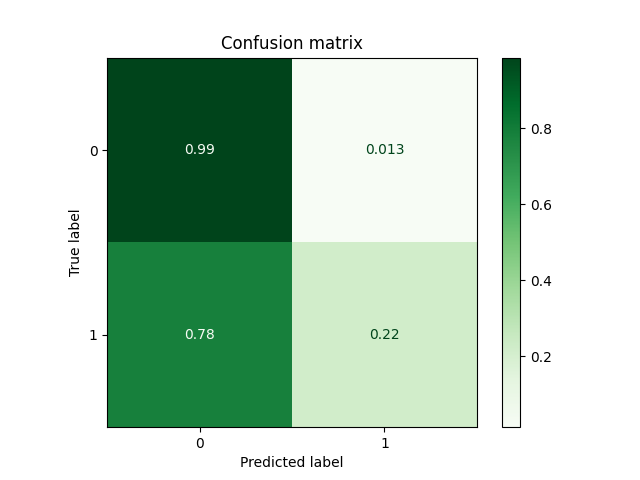

In [ ]:
Image('Confusion_matrix.png')

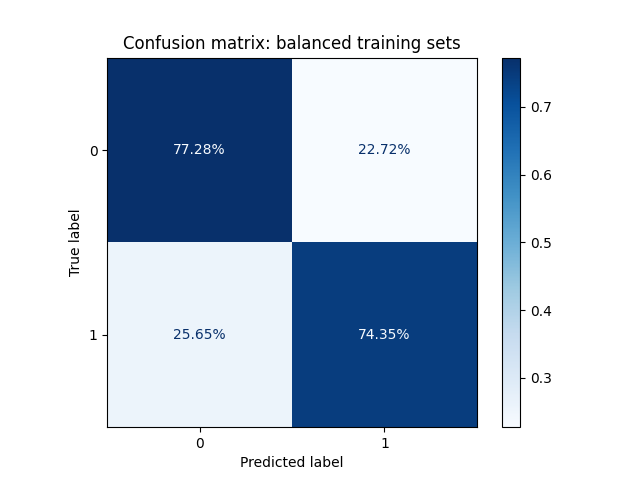

In [ ]:
Image('Confusion_matrix_balanced.png')

The first figure is the confusion matrix for the first iteration of the model.
The second figure is the confusion matrix for the second, balanced, iteration of the model.

Even though it appears that our accuracy tanked from the first model to the balanced model, we saw a dramatic increase from 21% to 74% accuracy in accurately predicting target 1 values.

____

## Communication of Results

The first iteration of the model was great for predicting target values of 0, or our *non-buyer group*. However, it struggled to accurately predict the other target, 1. This was due to the inherent imbalance in the data distribution in the provided data set. There is an uneven split of 0 to 1 targets in the dataset, with a ratio of about 9:1 respectively. So, the model was biased in selecting target 0 for any prediction because it was trained with a high population of 0 compared to 1.

The second iteration of the model aimed to balance the training sets by leveling the ratio of 0 to 1 from 9:1 to 1:1. We did this by sampling only a sub-section of the 0 targets to equal the number of 1 targets. This resulted in an overall decrease in the model's accuracy, but improved the accuracy of the model predicting the target 1.

- For this project, I used histograms, a correlation matrix, and confusion matrices.
  - The histograms were used to display the ranges and frequencies of the elements of the data set and later on the ranges and frequencies of the cross-validations.
  - The correlation matrix was used to map the correlation coefficients between all possible pairs of the 50 variable data columns.
  - The confusion matrices were used to display the frequencies of correct/incorrect target 1/0 predictions made by the model.
- Some other visualizations we could have used are boxplots to look at the distribution of variables for each input column. The boxplots could show us any outliers in the data set that may be skewing our model.



- On a third pass, I would go back and remove variables that do not show a standard normal distribution. I would also create boxplots for all of the variables to check for outliers. I would go in and delete any rows that have significant outliers.

- The main constraint I had on this project was time, but I feel I kept on a good timeline to gradually finish everything over the past week. Whenever I got stuck, my problem was always easy to google and find an answer on [StackedOverflow](https://stackoverflow.com/). Given more time, I would like to try re-running the EDA with the changes listed above to see if we can improve the accuracy of the model.